In [2]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

ImportError: dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so, 0x0002): tried: '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' (no such file), '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/_libs/pandas_parser.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))

In [ ]:
with open('all_confessions_cleaned.json', 'r') as fp:
    all_confessions = json.load(fp)

In [3]:
confessions_df = pd.DataFrame(all_confessions)

In [7]:
confessions_texts = confessions_df['text'].tolist()

In [13]:
[text for text in confessions_texts if not re.match(r'^#\d+', text)]

['That wraps up another year! Have a great Memorial Day weekend and a fantastic summer, everyone!',
 'Congratulations to the new MIT Class of 2019!!! #SuperPiDay #MIT2019',
 "That's a wrap! Have a great break, everyone!",
 'Woo! 5000 likes! Thanks, everyone!',
 'Happy Labor Day and Welcome back! Hit me up at http://www.college-confessions.com/MIT ',
 'We wouldn’t be MIT students if our reveal post wasn’t fashionably late. Surprise! We are so grateful to have served as your Confessions admins this past year.\n\nAs admins, we have had the opportunity to hear and amplify discourse on everything from your favorite classes to relationship advice to the long-term effects of late-stage capitalism. Your willingness to share your genuine thoughts and feelings has sparked meaningful conversations, built a supportive community, and most importantly, fostered empathy among us all. We have seen your kindness, your conviction, and your relentless desire to leverage your experiences to confront the c

In [85]:
valid_confessions = [text for text in confessions_texts if re.match(r'^#\d+', text)]
len(valid_confessions)

63071

In [86]:
min([len(x) for x in valid_confessions]), max([len(x) for x in valid_confessions])

(6, 16598)

In [112]:
import matplotlib

matplotlib.rcParams.update({'font.size': 12})

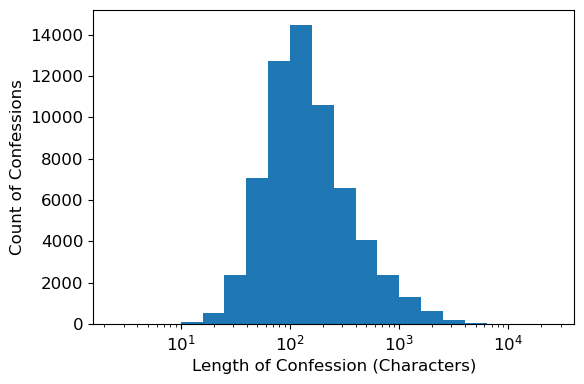

In [113]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.set_xscale('log')
bins = np.logspace(0.4, 4.4, 21)
ax.hist([len(x) for x in valid_confessions], bins=bins)
ax.set_xlabel('Length of Confession (Characters)')
ax.set_ylabel('Count of Confessions')
fig.tight_layout()
fig.savefig('Figures/char_count_log.png', dpi=300)

In [59]:
np.argmax([len(x) for x in valid_confessions])

np.int64(37419)

In [62]:
valid_confessions[37419]

'#37492 This a response to all who have commented/replied to my response of the “fat is negative” post. I tried to keep it short but yo\n\nTo the person who also responded to the original post & another who commented on some of the other posts: thanks for bringing up points that I didn’t touch on & for restating for those who don’t get what body-positivity means and why we are against fat-shaming. I appreciated your posts & hopefully others will take more to your approach *I know I can be more strong-worded and straightforward which can seem “mean”*\n\nTo the person with the Epstein last name: I honestly don’t even remember what your comment was; I initially had a response but forgot because your comment was so irrelevant and I could only remember wondering if you were related to the pedophile. \n\nTo the original submitter, \n\n1. I appreciate that you responded to explain your side of the original post and I empathize with your situation because I also have experienced that. My fathe

In [88]:
np.argmin([len(x) for x in valid_confessions])

np.int64(16221)

In [89]:
valid_confessions[16221]

'#61833'

In [69]:
counts = {}

SPECIALS = """!@#$%^&*()_+-=[]{};':",./<>?|\\‘’“”"""

confession_lengths = []

for text in valid_confessions:
    text = text.lower()
    for special in SPECIALS:
        text = text.replace(special, '')
    text.replace('\n', ' ')
    tokens = [token for token in text.split(' ')[1:] if token != '']
    confession_lengths.append(len(tokens))
    for token in tokens:
        counts[token] = counts.get(token, 0) + 1

In [70]:
len(counts)

81736

In [71]:
words_df = pd.DataFrame(list(sorted(((k, v) for k, v in counts.items()), key=lambda x: x[1], reverse=True)), columns=['Word', 'Count'])

In [72]:
words_df.to_csv('confessions_words.csv')

In [74]:
class_regex = [(text, count) for index, (text, count) in words_df.iterrows() if re.match(r'\d{3,}', text)]

In [84]:
pd.DataFrame(class_regex, columns=['Word', 'Count']).to_csv('classes_words.csv', index=False)

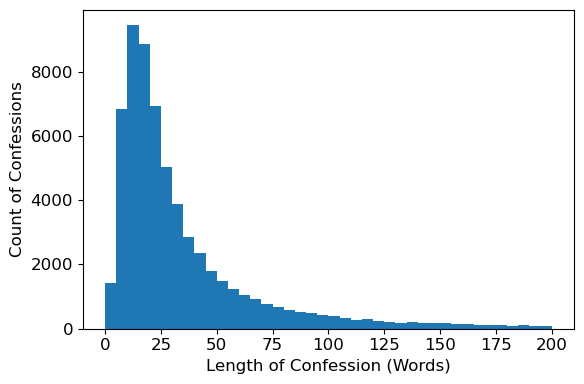

In [114]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist([l for l in confession_lengths if l < 201], bins=40)
ax.set_xlabel('Length of Confession (Words)')
ax.set_ylabel('Count of Confessions')
fig.tight_layout()
fig.savefig('Figures/word_count_200.png', dpi=300)

In [77]:
max(confession_lengths)

2928